<a href="https://colab.research.google.com/github/trypuz/ksiazka_si/blob/main/data_science/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NUMPY

`NumPy` to skrót od angielskiego wyrażenia *numerical Python*. Biblioteka NumPy jest bardzo pożyteczna wszędzie tam, gdzie będziemy mieli do czynienia z danymi numerycznymi (choć tablice NumPy mogą przechowywać również dane nienumeryczne). 

Z zasady Python to język interpretowany, w związku z czym narzut czasowy potrzebny na przeprowadzenie dużej ilości obliczeń może być znaczny. NumPy to biblioteka stworzona z myślą o rozwiązaniu tego problemu. Udostępnia ona interfejs programistyczny (ang. *API*) w Pythonie, ale najbardziej krytyczne pod względem szybkości działania fragmenty kodu NumPy zostały zaimplementowane w kompilowanym języku C. Dzięki takiemu rozwiązaniu mamy dostęp do wysokopoziomowego API bez straty wydajnościowej.

W rozdziale wprowadzającym struktury danych pisaliśmy o listach oraz o tym, że można z list tworzyć dość skomplikowane wielowymiarowe struktury danych. 

W Pythonie podstawowym sposobem na przechowywanie kilku wartości w jednym obiekcie jest użycie listy. Lista może zawierać dowolną liczbę obiektów, a typy poszczególnych obiektów w ramach jednej listy mogą być różne. Definicja listy w Pythonie wygląda w następujący sposób:



In [ ]:
some_list = [1, 2, 'test', True, 5.0]
print(f"Content of the list: {some_list}")
print(f"Data type: {type(some_list)}")

Content of the list: [1, 2, 'test', True, 5.0]
Data type: <class 'list'>


Jednak pomimo tego, że listy nadają się one do przechowywania danych, to mają poważne ograniczenia jeśli chodzi o wydajność przetwarzania tych danych, np. wykonywania na nich operacji matematycznych.  

W NumPy odpowiednikiem listy jest tablica (ang. *array*), a konkretniej klasa `ndarray` zdefiniowana w module `numpy` (importowanym jako `np`). Istnieje kilka różnic między tablicami w NumPy a listami w Pythonie, które sprawiają, że tablice w NumPy są praktycznie zawsze lepszym wyborem jeśli chodzi o obliczenia w Pythonie:
- Podstawową różnicą jest szybkość działania. Do przeprowadzania obliczeń NumPy wykorzystuje funkcje uniwersalne (ang. *universal functions*, w skrócie *ufuncs*), które udostępniają przystępne API w Pythonie i wydajną implementację w języku C.
- Tablice NumPy zajmują mniej miejsca w pamięci.

Obiektów `ndarray` mają również swoje ograniczenia, które są ich zaletą przyczynając się do wzrostu wydajności: 
- obiekty przechowywane w jednej tablicy NumPy muszą być tego samego typu
- brak możliwości zmiany wielkości obiektu po jego utworzeniu.

Podsumowując zalety NumPy: 
- optymalizuje użycie pamięci, 
- pozwala na stosowanie obliczeń bez konieczności wieloktronego używanie pętli for (iteracji), 
- wiele bibliotek z obszaru AI, w szczególności uczenia maszynowego i data science wymaga numpy.

## Instalacja
Jeżeli chodzi o instalację NumPy, to przebiega ona podobnie do większości opisanych w tej książce narzędzi. W większości przypadków wystarczy wykonanie jednej z dwóch następujących komend:

```
pip install numpy
```

lub:

```
conda install numpy
```

zależnie z którego narzędzia wolimy korzystać (w notatnikach pierwsza z komend będzie poprzedzona wykrzyknikiem: `!pip install numpy`). 

Import NumPy jest równie prosty i zazwyczaj ogranicza się do dodania następującej linii na początku:

In [ ]:
import numpy as np

Po więcej informacji odsyłamy do [dokumentacji](https://numpy.org/install/). 

## Wektory, macierze i tensory


Od razu na samym początku zaznaczymy, że będziemy zamiennie używać nazw „wielowymiarowa tablica” oraz „tensor”. 

Tablice możemy utworzyć z istniejącej listy za pomocą metody `np.array()`. Zaczniemy od prostej listy i utworzymy z niej jednowymiarową tablicę.


In [ ]:
number_list = [35, 180, 75]
arr_1d = np.array(number_list)
arr_1d

array([ 35, 180,  75])

Każdy tensor ma trzy główne atrybuty: `ndim` (liczba osi), `shape` (kształt) oraz `dtype` (typ danych). Zobaczmy jakie wartości otrzymamy dla tensora  `arr_1d`:

In [ ]:
print(f'ndim = {arr_1d.ndim}')
print(f'shape = {arr_1d.shape}')
print(f'dtype = {arr_1d.dtype}')

ndim = 1
shape = (3,)
dtype = int64


- Atrybut `ndim` określa ile osi ma tensor. Często wartość nim nazywamy **rangą tensora**. Tablica arr_1d ma jedną oś i jest nazywana **wektorem**. 

- Atrybut  `shape` określa **wymiar tensora** dla każdej jego osi. Wartość (3, ) atrybutu shape dla tensora  arr_1d oznacza, że jego jedyna oś ma trzy wymiary. *Wymiary można interpretować jako typy cech przypisanych do jakiegoś obiektu*. Na przykład kolejne pozycje wektora arr_1d można interpretować jako wiek (35), wzrost (180) oraz masę ciała (75).

- Atrybut `dtype` określa **typ danych** umieszczonych w tensorze. Wartość `int64` oznacza, że dane w tablicy `arr_1d` są liczbami całkowitymi z przedziału od -2 do potęgi 63 do 2 do potęgi 63 - 1. NumPy dostarcza wielu typów danych, których nie będziemy szczegółowo omawiać.

Tensory mają jeszcze trzy dodatkowe atrybuty `size`, `itemsize` oraz `nbytes`. Wsztstkie atrybuty z krorkim wyjaśnieniem zbiera tabela poniżej:

| Nazwa atrybutu | Opis |
| --- | --- |
| `ndim`     | Liczba wymiarów tabeli |
| `shape`    | Rozmiar poszczególnych wymiarów |
| `dtype`    | Typ danych tabeli |
| `size`     | Rozmiar tabeli, czyli liczba elementów znajdujących się w niej |
| `itemsize` | Rozmiar pojedynczego elementu tabeli w bajtach | 
| `nbytes`   | Rozmiar całej tabeli w bajtach |

Uwaga! Wektory nazywane są niekiedy „jednowymiarowymi tensorami”. Ta „jednowymiarowość” odnosi się wyłącznie do liczby osi tensora (nie do kształtu).

Tensory posiadające dwie osie nazywamy **macierzami** (ang. *matrix*) lub dwuwymiarowymi tensorami.

In [ ]:
number_list_2d = [[35, 180, 75],[22,167,50]]
arr_2d = np.array(number_list_2d)
arr_2d

array([[ 35, 180,  75],
       [ 22, 167,  50]])

In [ ]:
print(f'ndim = {arr_2d.ndim}')
print(f'shape = {arr_2d.shape}')
print(f'dtype = {arr_2d.dtype}')

ndim = 2
shape = (2, 3)
dtype = int64


Macierze korespondują z tabelami. Można więc mówić, że mają wiersze i kolumny. Macierz `arr_2d` ma kształt `(2, 3)`. Można więc powiedzieć, że ma dwa wiersze i trzy kolumny. Jeśli spojrzymy na wiersze macierzy jako na wektory, to będziemy mogli powiedzieć również o macierzy `arr_2d`, że składa się z dwóch trójwymiarowych wektorów. Innymi słowy, jeśli wektory tego samego kształtu umieści się w tablicy, to otrzymamy macierz.

Przykładami macierzy mogą być obrazki w skali szarości…
Kształt należy interpretować (wysokość, szerokość)

In [ ]:
window = [[  0,   0,   0,   0,   0,   0,   0],
          [  0, 255, 255,   0, 255, 255,   0],
          [  0, 255, 255,   0, 255, 255,   0],
          [  0, 255, 255,   0, 255, 255,   0],
          [  0,   0,   0,   0,   0,   0,   0]]

In [ ]:
window_a = np.array(window)

In [ ]:
print(f'ndim = {window_a.ndim}')
print(f'shape = {window_a.shape}')
print(f'dtype = {window_a.dtype}')

ndim = 2
shape = (5, 7)
dtype = int64


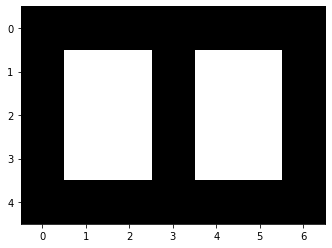

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(window_a, cmap='gray', vmin=0, vmax=255)
plt.show()

Jeśli umieścimy macierz w tablicy, to otrzymamy tensor trójwymiarowy. 

In [ ]:
number_list_3d = [[[35, 180, 75],[22,167,50]], 
                  [[35, 180, 74],[22,167,50]],
                  [[35, 180, 74],[22,167,49]]]
arr_3d = np.array(number_list_3d)
arr_3d

array([[[ 35, 180,  75],
        [ 22, 167,  50]],

       [[ 35, 180,  74],
        [ 22, 167,  50]],

       [[ 35, 180,  74],
        [ 22, 167,  49]]])

In [ ]:
print(f'ndim = {arr_3d.ndim}')
print(f'shape = {arr_3d.shape}')
print(f'dtype = {arr_3d.dtype}')

ndim = 3
shape = (3, 2, 3)
dtype = int64


## Tworzenia tablic za pomocą funkcji NumPy


NumPy udostępnia wiele sposobów na tworzenie tablic, z których kilka najbardziej często używanych omówimy w tej części. Poznaliśmy już funkcję `np.array`, tworzącą nową tablicę na podstawie listy. Funkcja `np.array` pozwala na określenie typu przechowywanych w niej danych z użyciem parametru `dtype`.

In [ ]:
array1 = np.array([1, 2, 3, 4, 5])
print(f"Default int type: {array1.dtype}")

array2 = np.array([1, 2, 3.0, 4, 5.0])
print(f"Default float type: {array2.dtype}")

array3 = np.array([1, 2, 3.0, 4, 5.0], dtype='float32')
print(f"Set type: {array3.dtype}")

Default int type: int64
Default float type: float64
Set type: float32


Jak widzimy, domyślnym typem danych dla tablicy, która składa się wyłącznie z liczb całkowitych, jest `int64`, a dla tablicy z liczbami zmiennoprzecinkowymi - `float64`. Liczba `64` reprezentuje liczbę bitów przeznaczonych na przechowanie poszczególnych wartości. `int64` to typ ze znakiem (ang. *signed*) dopuszczający zarówno liczby dodatnie, jak i ujemne. Jeżeli wiemy, że nasza tablica nie będzie zawierała liczb ujemnych, możemy użyc jednego z typów bez znaku, których nazwa zaczyna się od litery `u`, np. `uint64`. Typ możemy określać zarówno w formie napisu `'float64'`, jak i korzystając ze zdefiniowanej w NumPy stałej: `np.int64`.

Poniższa tabela zawiera kilka wybranych typów danych zdefiniowanych w NumPy. Pełną listę typów można zneleźć w [dokumentacji](https://numpy.org/devdocs/user/basics.types.html).

| Typ       | Opis | Zakres |
| --- | --- | --- |
| `bool_`   | Typ logiczny | Przyjmuje wartość `True` lub `False` |
| `int_`    | Domyślny typ dla liczb całkowitych; zazwyczaj `int64` lub `int32` | - |
| `int8`    | Liczby całkowite 8-bitowa ze znakiem (tj. reprezentowana przez 8 bitów i mogąca przyjmować wartości ujemne) | Od -128 do 127 |
| `int16`   | Liczba całkowita 16-bitowa ze znakiem | Od -32768 do 32767 |
| `int32`   | Liczba całkowita 32-bitowa ze znakiem | Od -2147483648 do 2147483647 |
| `int64`   | Liczba całkowita 64-bitowa ze znakiem | Od -9223372036854775808 do 9223372036854775807 |
| `uint8`   | Liczba całkowita 8-bitowa bez znaku | Od 0 do 255 |
| `float_`  | Domyślna liczba zmiennoprzecinkowa; alias dla `float64` | - |
| `float32` | Liczba zmiennoprzecinkowa pojedynczej precyzji | 1 bit przeznaczony jest na znak, 8 bitów - wykładnik, 23 bity - mantysę |
| `float64` | Liczba zmiennoprzecinkowa podwójnej precyzji (ang. *double precision* ) | 1 bit przeznaczony jest na znak, 11 bitów - wykładnik, 52 bity - mantysę |

Kolejną przydatną funkcją do tworzenia tablic jest `np.arange`, która pozwala na inicjalizowanie tablic kolejnymi liczbami naturalnymi z zadanego przedziału oraz ze wskazanym krokiem.

Metoda `np.arange()` tworzy wektor z wartościami w sposób pokazany poniżej (zauważmy, że zachowuje się podanie do poznaniej wcześniej funkcji `range()`):

In [ ]:
array1 = np.arange(10)
print(f"arange(10):       {array1}")

array2 = np.arange(5, 10)
print(f"arange(5, 10):    {array2}")

array3 = np.arange(0, 10, 2)
print(f"arange(0, 10, 2): {array3}")

arange(10):       [0 1 2 3 4 5 6 7 8 9]
arange(5, 10):    [5 6 7 8 9]
arange(0, 10, 2): [0 2 4 6 8]


In [ ]:
np.arange(1,7)

array([1, 2, 3, 4, 5, 6])

In [ ]:
np.arange(1,7,2)

array([1, 3, 5])

Jeżeli podczas tworzenia tablicy nie wiemy, jakie znajdą się w niej wartości, możemy stworzyć nową tablicę wypełnioną zerami lub jedynkami, wykorzystując funkcje - odpowiednio - `np.zeros` lub `np.ones`. Funkcje te jako pierwszy argument przyjmą rozmiar tablicy. Na poniższym listingu widać również, że możemy specyfikować typ danych tworzonych tablic.

In [ ]:
np.zeros(6)

array([0., 0., 0., 0., 0., 0.])

In [ ]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
zeros1 = np.zeros(10)
print(f"zeros1: {zeros1}")

zeros2 = np.zeros(10, dtype=np.int32)
print(f"zeros2: {zeros2}")

ones1 = np.ones(10)
print(f"ones1:  {ones1}")

ones2 = np.ones(10, dtype=np.int32)
print(f"ones2:  {ones2}")

zeros1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zeros2: [0 0 0 0 0 0 0 0 0 0]
ones1:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
ones2:  [1 1 1 1 1 1 1 1 1 1]


Wykorzystując te funkcje możemy również stworzyć tablicę wielowymiarową. Robimy to przez przekazanie krotki (tupli) z wielkościami poszczególnych wymiarów jako pierwszy argument funkcji. Przykład:

In [ ]:
zeros_2x3 = np.zeros((2, 3), dtype=np.int32)
print(f"zeros_2x3:\n{zeros_2x3}")

zeros_2x3:
[[0 0 0]
 [0 0 0]]


Pierwszy argument krotki definiuje liczbę wierszy, a drugi liczbę kolumn. 

Widzieliśmy już tablice jedno- i dwuwymiarowe, ale co gdy potrzebujemy więcej wymiarów? Okazuje się, że używając opisanego podejścia możemy definiować więcej wymiarów, co pokazujemy poniżej. Jednak ze względu na problematyczność prezentacji tablic z więcej niż dwoma wymiarami, w dalszych opisach ograniczamy się do tablic jedno- i dwuwymiarowych.

In [ ]:
zeros_2x3x4 = np.zeros((2, 3, 4), dtype=np.int32)
print(zeros_2x3x4)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


Poznaliśmy już sposób na inicjalizowanie tablic zerami i jedynkami, ale co z inicjalizacją tablicy innymi wartościami? NumPy udostępnia funkcję `np.full`, która pozwala na inicjalizowanie tablicy dowolną wartością. Pierwszy argument tej funkcji odpowiednio za definiowanie rozmiaru (-ów) tablicy, a drugi przyjmuje wartość, którą mają zostać zainicjalizowane wszystkie komórki tablicy.

In [ ]:
pi_array = np.full((2, 3), 3.14)
print(f"PI array:\n{pi_array}")

PI array:
[[3.14 3.14 3.14]
 [3.14 3.14 3.14]]


Oprócz opisanych już sposobów tworzenia nowych tablic, NumPy udostępnia jeszcze wiele innych, o których wspominamy wyłącznie w poniższej tabeli, a po więcej informacji odsyłamy czytelnika do [dokumentacji](TODO).

Podobną funkcją `np.linspace()`. Zwraca ona tablicę z wartościami równomiernie rozłożonymi między zadanymi wartościami i wartością „kroku”.

In [ ]:
np.linspace(1,7,3)

array([1., 4., 7.])

In [ ]:
#np.logspace()

Tworzy tablicę dwuwymiarową (macierz) jednostkową, gdzie na wejściu definiowany jest jej wymiar.

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
a = np.arange(5)
b = a.copy()
b

array([0, 1, 2, 3, 4])

### Zapisywanie i wczytywanie tablic

In [ ]:
np.save("my_array", a)

In [ ]:
np.savez("my_array", a, b)

In [ ]:
np.savetxt("my_array.csv", a, delimiter=',')

In [ ]:
c = np.load("my_array.npy")
c

array([0, 1, 2, 3, 4])

In [ ]:
c = np.loadtxt("my_array.csv", delimiter=',')
c

array([0., 1., 2., 3., 4.])

### Random

Tworzy pusta (niezainicjalizowaną) tablicę o podanym rozmiarze. Wartości w poszczególnych komórkach jest przypadkowe.

In [ ]:
np.empty((2,2))

array([[5.e-324, 5.e-324],
       [5.e-324, 0.e+000]])

In [ ]:
np.ndarray((2,2))

array([[5.e-324, 5.e-324],
       [5.e-324, 0.e+000]])

NumPy udostępnia możliwość inicjalizowania tablic wartościami wygenerowanymi (pseudo)losowo. Funkcja `np.random.random` zwraca tablicę wypełnioną liczbami zmiennoprzecinkowymi z zakresu `[0.0, 1.0)`. Z kolei funkcja `np.random.normal` generuje losowe wartości dane rozkładem normalnym (zwanym również rozkładem Gaussa) domyślnie ze środkiem w zerze oraz odchyleniem standardowym równym 1. Środek i odchylenie można zmienić przez przekazanie odpowiednich argumentów do funkcji. Ostatnią funkcją generującą tablice z wartościami losowymi jest funkcja `np.random.randinit`, która przyjmuje na wejściu dwie liczby określające początek i koniec zakresu losowo generowanych liczb całkowitych.

In [ ]:
array1 = np.random.random(5)
print(f"random(5):          {array1}")

array2 = np.random.random((3, 3))
print(f"random((3, 3)):   \n{array2}")

array3 = np.random.normal(size=5)
print(f"normal(size=5):     {array3}")

array4 = np.random.normal(0, 5, (3, 3))
print(f"normal(0, 5, (3,3)):\n{array4}")

array5 = np.random.randint(10)
print(f"randint(0, 10):     {array5}")

array6 = np.random.randint(0, 10, (3, 3))
print(f"randint(0, 10, (3, 3)):\n{array6}")

random(5):          [0.17766626 0.07968745 0.97367797 0.76259372 0.10799472]
random((3, 3)):   
[[0.69387296 0.10740535 0.13192494]
 [0.5701371  0.43710368 0.93884645]
 [0.80632546 0.09098489 0.47081152]]
normal(size=5):     [ 0.5873014   0.12388572 -0.2527302  -0.18529837  0.71133511]
normal(0, 5, (3,3)):
[[  2.54319411  -0.25230707  -0.96919505]
 [  0.83034369  -5.27793662  -2.32667131]
 [  0.97381594 -10.54881596   3.22834525]]
randint(0, 10):     6
randint(0, 10, (3, 3)):
[[6 5 2]
 [9 6 3]
 [6 8 0]]


In [ ]:
np.random.rand(2)

array([0.07492331, 0.24106443])

In [ ]:
np.random.rand(2,2)

array([[0.16743573, 0.30332658],
       [0.36651344, 0.03930446]])

In [ ]:
# uniform vs. standard normal distribution (mean 0; variance 1)

np.random.randn(2,3)

array([[-0.38342014, -0.34040987,  1.87649948],
       [-0.39434173, -0.27731501,  0.00407483]])

In [ ]:
np.random.randint(1,7)

3

In [ ]:
np.random.randint(1,7, (2,3))

array([[5, 2, 3],
       [3, 6, 6]])

In [ ]:
np.random.seed(2)
np.random.rand(7)

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239])

In [ ]:
a = np.arange(25)
rana = np.random.randint(0,50,10)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
rana

array([46,  8, 45, 15, 41, 45,  8, 17, 22,  9])

In [ ]:
a.shape

(25,)

In [ ]:
a.reshape(5,5) # nie zmienia a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
a.reshape(3,5)

ValueError: ignored

In [ ]:
rana.dtype

dtype('int64')

## Praca z elementami tablicy

### Pobieranie i zmiana elementów tablicy

Poznaliśmy już różne sposoby tworzenia tablic oraz dowiedzieliśmy się, jak możemy sprawdzić właściwości tablicy. Teraz przejdziemy do opisania sposobów dostępu do elementów przechowywanych w tablicy.

Zacznijmy od najprostszego przypadku, jakim jest dostęp do pojedynczego elementu tablicy jednowymiarowej. Do tego celu używamy operatora dostępu (`[]`), tak samo jak w Pythonie. Oto przykład pobrania pierwszego, piątego i ostatniego elementu z tablicy (identycznie jak w Pythonie, elementom są indeksowane zaczynając od 0):

In [ ]:
array = np.arange(1, 11)
print(f"First element (array[0]):  {array[0]}")
print(f"Fifth element (array[4]):  {array[4]}")
print(f"Last element (array[-1]):  {array[-1]}")

try:
    print(f"Not existing element: {array[11]}")
except IndexError:
    print("When getting element out of bounds IndexError is raised.")

First element (array[0]):  1
Fifth element (array[4]):  5
Last element (array[-1]):  10
When getting element out of bounds IndexError is raised.


Powyższy przykład pokazuje, że twórcy NumPy starali się by praca z tą biblioteką jak najbardziej przypominała pracę z "czystym" Pythonem. Dotyczy to wykorzystania tego samego operatora dostępu do elementów listy, ale również tego, że ostatni element tablicy, analogicznie jak w Pythonie dla list, pobierany jest za pomocą indeksu `-1`, a dostęp do przedostatniego elementu jest realizowany indeksem `-2` itd. Próba dostępu do elementu, który nie istnieje, kończy się rzuceniem wyjątku `IndexError`.

Wiemy już jak odnosić się do poszczególnych elementów tablicy jednowymiarowej, ale co z tablicami dwuwymiarowymi? Podobnie jak poprzednio, twórcy NumPy zaimplementowali podejście zgodne z rozwiązaniem dostępnym w Pythonie, czyli użycie dwóch operatorów dostępu, przyjmujących następujący format: `array[M][N]`, gdzie `M` odnosi się do indeksu wiersza, a `N` do indeksu kolumny.  Alternatywnie, możemy również użyć notacji `[M, N]`. Dla lepszego zobrazowania tego tematu podajemy kilka przykładów:

In [ ]:
array = np.arange(1, 9).reshape(2, 4)
print(f"Two-dimensional array:\n{array}")
print(f"array[0][0]:   {array[0][0]}")
print(f"array[0, 0]:   {array[0, 0]}")
print(f"array[0][3]:   {array[0][3]}")
print(f"array[-1][-2]: {array[-1][-2]}")

Two-dimensional array:
[[1 2 3 4]
 [5 6 7 8]]
array[0][0]:   1
array[0, 0]:   1
array[0][3]:   4
array[-1][-2]: 7


Pomińmy chwilowo sposób działania funkcji `reshape`, która została użyta w przykładzie (temat ten omówimy niebawem) i ograniczmy się do stwierdzenia, że w przykładzie została utworzona tablica dwuwymiarowa składająca się z dwóch wierszy i czterech kolumn. Przykładowo, dostęp do elementu znajdującego się w pierwszym wierszu (indeks: `0`) i czwartej kolumnie (indeks: `3`) realizowany jest za pomocą `array[0][3]`. Indeksy ujemne w tablicach dwuwymiarowych działają tak samo jak w tablicach jednowymiarowych. `array[-1][-2]` odnosi się do elementu znajdującego się w ostatnim wierszu i przedostatniej kolumnie.

Omówiliśmy dostęp do poszczególnych elementów tablicy, teraz przejdziemy do omówienia sposobów zmiany wartości elementów tablicy. I w tym przypadku nie będzie zaskoczenia, gdyż zmiana poszczególnych elementów tablicy odbywa się analogicznie do zmian elementów w listach Pythonowych. Poniżej pokazujemy kilka przykładów zmiany elementów dla tablic jedno- i dwuwymiarowych.

In [ ]:
array1 = np.arange(1, 11)
print(f"1D array before modyfing: {array1}")
array1[0] = 101
array1[4] = 105
array1[-1] = 110
print(f"1D array after modyfing: {array1}\n")

array2 = np.arange(1, 10).reshape((3, 3))
print(f"2D array before modyfing:\n{array2}")
array2[0][0] = 101
array2[0, 0] = 201
array2[1][1] = 105
array2[-1][-1] = 110
print(f"2D array after modyfing:\n{array2}")

1D array before modyfing: [ 1  2  3  4  5  6  7  8  9 10]
1D array after modyfing: [101   2   3   4 105   6   7   8   9 110]

2D array before modyfing:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
2D array after modyfing:
[[201   2   3]
 [  4 105   6]
 [  7   8 110]]


In [ ]:
a = np.arange(0,11)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
a[5]

5

In [ ]:
a[1:5]

array([1, 2, 3, 4])

In [ ]:
a[5:]

array([ 5,  6,  7,  8,  9, 10])

In [ ]:
a_2d = np.array([[1, 2, 3], [4, 5, 6]])
a_2d

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a_2d[1]

array([4, 5, 6])

In [ ]:
a_2d[1,:]

array([4, 5, 6])

In [ ]:
a_2d[1][1]

5

In [ ]:
a > 5

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True])

In [ ]:
a[a > 5]

array([ 6,  7,  8,  9, 10])

In [ ]:
a[a != 5]

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10])

### Podtablice i zmiana wymiarów tablic

Podobnie jak w Pythonie, również w NumPy mamy możliwość odnoszenia się do wybranego fragmentu tablicy. W języku angielskim fragment tablicy określany jest mianem `array slice`. W języku polskim będziemy używali określenia podtablica. Podstawowa składnia do pobierania podtablic prezentuje się następująco: `array[start:end:step]`. `start` określa indeks początkowy, gdzie ma zaczynać się podtablica, `end` określa indeks końcowy, przed którym ma kończyć się podtablica, a `step` określa krok, co który zostanie pobrana wartość z tablicy. Możemy pominąć `step` (wraz z poprzedzającym go dwukropkiem) i wtedy przyjmuje on domyślnie wartość `1`, czyli pobieramy elementy jeden po drugim (co jeden). Możemy również pominąć `start` (zostawiając dwukropek za nim), co oznacza, że chcemy pobrać wartości od początku tablicy (czyli `array[:5]` jest równoznaczne z `array[0:5]`). Jeżeli z kolei pominiemy `end`, to pobierzemy wszystkie elementy do końca tablicy.

Poniżej prezentujemy kilka przykładów dla tablic jednowymiarowych:

In [ ]:
array = np.arange(1, 11)
print(f"Input table:   {array}")
print(f"array[3:5]:    {array[3:5]}")
print(f"array[0:5]:    {array[0:5]}")

print(f"array[:5]:     {array[:5]}")
print(f"array[3:]:     {array[3:]}")

print(f"array[0:10:5]: {array[0:10:5]}")
print(f"array[3:8:2]:  {array[3:8:2]}")

print(f"array[::]:     {array[::]}")
print(f"array[::-1]:   {array[::-1]}")

Input table:   [ 1  2  3  4  5  6  7  8  9 10]
array[3:5]:    [4 5]
array[0:5]:    [1 2 3 4 5]
array[:5]:     [1 2 3 4 5]
array[3:]:     [ 4  5  6  7  8  9 10]
array[0:10:5]: [1 6]
array[3:8:2]:  [4 6 8]
array[::]:     [ 1  2  3  4  5  6  7  8  9 10]
array[::-1]:   [10  9  8  7  6  5  4  3  2  1]


Dodajmy kilka wyjaśnień do powyższych przykładów. Kod `array[::]`, podobnie jak jego odpowiednik w Pythonie, zwraca całą wejściową tablicę. Inaczej jednak niż w Pythonie, nie zwraca *kopii* tej tablicy, ale wyłącznie tworzy dla niej widok. Podkreślamy to jeszcze raz: mechanizm podtablic nie tworzy nowej tablicy, ani też nie kopiuje jej zawartości w inne miejsce w pamięci. Podtablice zwracają widok tablic, na podstawie których są tworzone. W związku z tym modyfikacja elementu podtablicy modyfikuje również tablicę wejściową. Oto przykłady prezentujący modyfikowanie podtablic:

In [ ]:
array = np.arange(1, 6)
print(f"Input array:         {array}")
view = array[::]
print(f"View array:          {view}")
view[0] = 101
print(f"Changed view array:  {view}")
print(f"Input array:         {array}")

Input array:         [1 2 3 4 5]
View array:          [1 2 3 4 5]
Changed view array:  [101   2   3   4   5]
Input array:         [101   2   3   4   5]


Podtablice wielowymiarowe tworzy się przez wskazanie podtablicy dla każdego z wymiarów w taki sam sposób, jak robiliśmy to dla tablic jednowymiarowych. Poniżej prezentujemy przykłady tworzenia podtablic dla tablicy dwuwymiarowej 3 na 4.

In [ ]:
array2d = np.arange(1, 13).reshape(3, 4)
print(f"Input 2D array:\n{array2d}")
print(f"array2d[1:2, 0:3]:\n{array2d[1:3, 0:2]}")
print(f"array2d[:, 2:]:\n{array2d[:, 2:]}")
print(f"array2d[:, :]: \n{array2d[:, :]}")
print(f"array2d[::-1, ::-1]: \n{array2d[::-1, ::-1]}")
print(f"array2d[1, :]:\n{array2d[1, :]}")
print(f"array2d[:, 2]:\n{array2d[:, 2]}")

Input 2D array:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
array2d[1:2, 0:3]:
[[ 5  6]
 [ 9 10]]
array2d[:, 2:]:
[[ 3  4]
 [ 7  8]
 [11 12]]
array2d[:, :]: 
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
array2d[::-1, ::-1]: 
[[12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]
array2d[1, :]:
[5 6 7 8]
array2d[:, 2]:
[ 3  7 11]


Ostatnie dwa przykłady prezentują dostęp do pojedynczego wiersza i pojedynczej kolumny, co często okazuje się przydatne. 

Wyżej wspomnieliśmy, że podtablice nie tworzą nowych kopii tablic, na podstawie których są tworzone. Co jednak w sytuacji, gdy chcemy zmodyfikować podtablicę, ale bez modyfikacji tablicy źródłowej? W tym celu należy użyć funkcji `copy()`, która utworzy nową tablicę na podstawie widoku. Poniżej prezentujemy przykład

In [ ]:
array1 = np.arange(1, 11)
print(f"Input array:  {array1}")

view = array1[2:7]
print(f"View array:   {view}")

copied = view.copy()
print(f"Copied array: {copied}")

copied[0] = 303

print(f"Copied array after change:  {copied}")
print(f"Input array still intact:   {array1}")
print(f"View array still intact:    {view}")

Input array:  [ 1  2  3  4  5  6  7  8  9 10]
View array:   [3 4 5 6 7]
Copied array: [3 4 5 6 7]
Copied array after change:  [303   4   5   6   7]
Input array still intact:   [ 1  2  3  4  5  6  7  8  9 10]
View array still intact:    [3 4 5 6 7]


### Zmiana wymiarów tablicy

W niektórych z powyższych przykładów używaliśmy funkcji `reshape`, której zadaniem jest zmiana wymiarów tablicy zgodnie z podanymi na wejściu wymiarami. Podane wymiary muszą się zgadzać z rozmiarem tablicy. Przykładowo jeżeli docelowe wymiary tablicy to 3 na 3, rozmiar tablicy wejściowej musi się równać 9. Poniżej pokazujemy przykłady użycia funkcji `reshape`:

In [ ]:
array = np.arange(1, 10)
print(f"One-dimensional array: {array}")
array2 = array.reshape((3, 3))
print(f"Two-dimensional array (3x3):\n{array2}")
array3 = array2.reshape((1, 9))
print(f"Two-dimensional array (1x9):\n{array3}")

One-dimensional array: [1 2 3 4 5 6 7 8 9]
Two-dimensional array (3x3):
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Two-dimensional array (1x9):
[[1 2 3 4 5 6 7 8 9]]


Istnieje również możliwość dodania nowego wymiaru z wykorzystaniem `np.newaxis` oraz opisanej wyżej notacji dla podtablic. Poniżej zamieszczamy przykłady:

In [ ]:
array = np.arange(1, 10)
array2 = array[np.newaxis, :]
print(f"Two-dimensional array (1x9):\n{array2}")
array3 = array[:, np.newaxis]
print(f"Two-dimensional array (9x1):\n{array3}")

Two-dimensional array (1x9):
[[1 2 3 4 5 6 7 8 9]]
Two-dimensional array (9x1):
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


### Konkatenacja tablic i ich dzielenie

Powyżej opisaliśmy już prawie wszystkie podstawowe operacje na tablicach w NumPy. Pozostały nam do opisania sposoby łączenia i dzielenia tablic. Zacznijmy od operacji łączenia kilku tablic w jedną, którą nazywa się alternatywnie konkatenacją. 

W celu połączenia dwóch lub więcej tablic w jedną używamy funkcji `np.concatenate`. Dla tablic jednowymiarowych użycie tej funkcji jest bardzo proste:

In [ ]:
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
array3 = np.array([7, 8, 9])
final_array = np.concatenate([array1, array2, array3])
print(f"Input arrays: {array1}, {array2}, {array3}")
print(f"Final array:  {final_array}")

Input arrays: [1 2 3], [4 5 6], [7 8 9]
Final array:  [1 2 3 4 5 6 7 8 9]


W przypadku tablic dwuwymiarowych konkatenacja jest możliwa o tyle, o ile zgadza się liczba elementów wzdłuż osi tablicy względem której mają być ze sobą łączone. Łatwiej będzie to nam pokazać na przykładzie:

In [ ]:
array1 = np.array([[1, 2, 3]])
array2 = np.array(
    [[4, 5, 6],
     [7, 8, 9]]
)
final_array = np.concatenate([array1, array2], axis=0)
print(f"Final array:\n{final_array}")
# final_array = np.concatenate([array1, array2], axis=1)

Final array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


Jak widać na powyższym przykładzie, gdy jako oś wzdłuż której ma dokonać się połączenie tablic wskażemy `0`, tablice zostaną połączone. Jednak jeżeli byśmy użyli indeksu `1` (jak w wykomentowanym przykładzie), zostanie zwrócony błąd. Innym sposobem na określenie osi wzdłuż której mają zostać połączone tablice jest użycie funkcji `np.vstack` oraz `np.hstack`, zaprezentowane poniżej.

In [ ]:
array1 = np.array([1, 2, 3])
array2 = np.array([
    [4, 5, 6],
    [7, 8, 9]
])
vstacked_array = np.vstack([array1, array2])
print(f"Vstacked array:\n{vstacked_array}")

array1 = np.array([
    [1, 2],
    [4, 5],
    [7, 8]
])
array2 = np.array([
    [3],
    [6],
    [9]
])
hstacked_array = np.hstack([array1, array2])
print(f"Hstacked array:\n{hstacked_array}")

Vstacked array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Hstacked array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Operacje matematyczne

## Podstawowe operacje arytmetyczne

Omówiliśmy już podstawowe operacje z użyciem tablic w NumPy. Pora przejść do operacji arytmetycznych, gdzie biblioteka NumPy jest szczególnie przydatna. Zaczniemy od omówienia podstawowych operacji arytmetycznych, które zebraliśmy w poniższej tabeli. 

| Operator | Funkcja w NumPy | Opis | Przykład użycia |
| --- | --- | --- | --- |
| `+`   | `np.add`          | Dodaje liczbę do elementów tablicy   | `array + 10` |
| `-`   | `np.subtract`     | Odejmuje liczbę od elementów tablicy | `array - 10` |
| `-`   | `np.negative`     | Zmienia znak elementów tablicy       | `-array`     |
| `*`   | `np.multiply`     | Mnoży elementy tablicy przez liczbę  | `array * 10` |
| `/`   | `np.divide`       | Dzieli elementy tablicy przez liczbę | `array / 10` |
| `//`  | `np.floor_divide` | Dzieli bez reszty elementy tablicy przez liczbę | `array // 10` |
| `**`  | `np.power`        | Potęguje elementy tablicy wskazaną liczbę razy  | `array ** 10` |
| `%`   | `np.mod`          | Zwraca resztę z dzielenia elementów tablicy przez liczbę | `array % 10` |

Nie ma tutaj żadnych zaskoczeń, działanie wszystkich operatorów jest spójne z ich odpowiednikami w Pythonie. Poniżej prezentujemy wyniki działania wszystkich przedstawionych operacji arytmetycznych.

In [ ]:
array = np.arange(1, 11)
print(f"Input array:       {array}")
print(f"Input array + 10:  {array + 10}")
print(f"Input array - 10:  {array - 10}")
print(f"Input -array:      {-array}")
print(f"Input array * 10:  {array * 10}")
print(f"Input array / 10:  {array / 10}")
print(f"Input array // 10: {array // 10}")
print(f"Input array ** 3:  {array ** 3}")
print(f"Input array % 5:   {array % 5}")

Input array:       [ 1  2  3  4  5  6  7  8  9 10]
Input array + 10:  [11 12 13 14 15 16 17 18 19 20]
Input array - 10:  [-9 -8 -7 -6 -5 -4 -3 -2 -1  0]
Input -array:      [ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]
Input array * 10:  [ 10  20  30  40  50  60  70  80  90 100]
Input array / 10:  [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Input array // 10: [0 0 0 0 0 0 0 0 0 1]
Input array ** 3:  [   1    8   27   64  125  216  343  512  729 1000]
Input array % 5:   [1 2 3 4 0 1 2 3 4 0]


Zwróćmy uwagę, że operatory arytmetyczne nie modyfikują tablicy wejściowej, lecz tworzą jej kopie. Dlatego w powyższym przykładzie możemy używać tej samej tablicy dla każdego z operatorów.

Oprócz powyżej opisanych operacji arytmetycznych NumPy udostępnia jeszcze wiele innych operacji liczbowych na tablicach. Wśród nich można wymienić między innymi działania trygonometryczne, operacje potęgowania i pierwiastkowania, logarytmy, czy wartość bezwględna. Zainteresowanych czytelników odsyłamy do [dokumentacji](TODO).

In [ ]:
a = np.arange(1,4)
a_2d = np.array([[1, 2, 3], [4, 5, 6]])
a_2d

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a * a

array([1, 4])

In [ ]:
a_2d * a_2d

array([[ 1,  4,  9],
       [16, 25, 36]])

In [ ]:
a_2d * a

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [ ]:
a + a

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [ ]:
a - a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
a / a

array([1., 1., 1.])

In [ ]:
1 / a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([       inf, 1.        , 0.5       , 0.33333333, 0.25      ,
       0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
       0.1       ])

In [ ]:
a*2

array([2, 4, 6])

In [ ]:
a**2

array([1, 4, 9])

In [ ]:
np.exp(a)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03, 2.20264658e+04])

In [ ]:
np.sqrt(a)

array([1.        , 1.41421356, 1.73205081])

In [ ]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111])

In [ ]:
np.cos(a)

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362,
        0.28366219,  0.96017029,  0.75390225, -0.14550003, -0.91113026,
       -0.83907153])

In [ ]:
np.log(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436,
       1.60943791, 1.79175947, 1.94591015, 2.07944154, 2.19722458,
       2.30258509])

In [ ]:
a_2d.max()
a_2d.argmax()
# a.min()
# a.argmin()
a_2d.sum()
a.mean()
a.var() # variance
a.std() # standard deviation

0.816496580927726

In [ ]:
a_2d = np.array([[1, 2, 3], [4, 5, 6]])
a_2d

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
a_2d.sum()

21

In [ ]:
a_2d.sum(axis=0)

array([5, 7, 9])

In [ ]:
a_2d.sum(axis=1)

array([ 6, 15])

### ...

In [ ]:
a.tolist()

[1, 2, 3]

In [ ]:
a_2d.flatten()

array([1, 2, 3, 4, 5, 6])

In [ ]:
a_2d.flatten(order='F')

array([1, 4, 2, 5, 3, 6])

In [ ]:
b = np.array([[1], [2], [3]])
b

array([[1],
       [2],
       [3]])

In [ ]:
np.squeeze(b)

array([1, 2, 3])

In [ ]:
b_2d = np.array([[2, 1, 3], [6, 5, 4]])
np.sort(b_2d)
np.sort(b_2d, axis=0)

array([[2, 1, 3],
       [6, 5, 4]])

In [ ]:
a.fill(1)
print(a)

NameError: ignored

## Agregacje

Agregacje to operacje, które pozwalają na uzyskanie podstawowych informacji statystycznych o pewnym zbiorze danych liczbowych. Wśród dostępnych operacji agregujących są między innymi: średnia arytmetyczna, mediana, odchylenie standardowe, wartość najmniejsza (min) i największa (max), czy suma. Zaczniemy od zaprezentowania kilku podstawowych funkcji agregujących, a później pokażemy ich wykorzystanie na podstawie bardziej realistycznego przykładu.

Operacji sumowania wartości w tabeli dokonuje się za pomocą funkcji `np.sum`. Od razu zwróćmy uwagę na fakt, że ta funkcja jest różna od dostępnej w Pythonie funkcji `sum`, i pod względem wydajności wypada zdecydowanie lepiej. Poniższy przykład pokazuje sumowanie 1000 liczb w tablicy.

In [ ]:
array = np.arange(1, 1001)

%timeit np.sum(array)

2.71 µs ± 10.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
%timeit sum(array)

57.3 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Jak widać, różnica w szybkości wykonania między `np.sum` i `sum` jest znaczna.

NumPy udostępnia również `np.min` i `np.max`, które zwracają, odpowiednio, najmniejszą i największą wartość w tablicy. Działanie tych funkcji pokazujemy na prostym przykładzie.

In [ ]:
array = np.arange(1, 11)
print(f"Array: {array}")
print(f"Min: {np.min(array)}")
print(f"Max: {np.max(array)}")

Array: [ 1  2  3  4  5  6  7  8  9 10]
Min: 1
Max: 10


W powyższym przykładzie użyliśmy tablicy jednowymiarowej. Dla tablic dwu- i więcej- wymiarowych domyślne działanie jest takie same, ale można również dokonywać agregacji tylko wzdłuż wybranej osi. Pokazujemy to na poniższym przykładzie.

In [ ]:
array = np.arange(1, 10).reshape(3, 3)
print(f"Array:\n{array}")
print(f"Sum: {np.sum(array)}")
print(f"Sum (axis=0): {np.sum(array, axis=0)}")
print(f"Sum (axis=1): {np.sum(array, axis=1)}")

Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum: 45
Sum (axis=0): [12 15 18]
Sum (axis=1): [ 6 15 24]


Oprócz `np.sum`, `np.min` i `np.max`, NumPy udostępnia wiele innych operacji agregacji, które wraz z już omówionymi zostały opisane w poniższej tabeli. Część z nich zostanie pokazane w przykładzie poniżej.

| Nazwa funkcji | Opis |
| --- | --- |
| `np.sum`  | Oblicza sumę wszystkich elementów. |
| `np.prod` | Oblicza iloraz wszystkich elementów. | 
| `np.mean` | Oblicza średnią arytmetyczną wszystkich elementów. |
| `np.std`  | Oblicza odchylenie standardowe dla wszystkich elementów. |
| `np.var`  | Oblicza wariancję dla wszystkich elementów. |
| `np.min`  | Zwraca najmniejszą wartość w tablicy. |
| `np.max`  | Zwraca największą wartość w tablicy. |
| `np.argmin` | Zwraca indeks najmniejszej wartości w tablicy. | 
| `np.argmax` | Zwraca indeks największej wartości w tablicy. |
| `np.median` | Oblicza medianę wszystkich elementów w tablicy. |
| `np.percentile` | Oblicza percentyle... TODO |
| `np.any` | TODO |
| `np.all` | TODO |

### Przykład

Wykorzystania agregacji w praktyce pokażemy z wykorzystaniem zestawu przykładowych wyników kilku uczniów na sprawdzianach z wybranych przedmiotów. Poniższa tabela przedstawia ich formę bardziej graficzną.

| Uczeń  | J. polski | Matematyka | Historia | Fizyka |
|---|---|---|---|---|
| Jan    | 64        | 78         | 52       | 51     |
| Piotr  | 42        | 38         | 89       | 36     |
| Maria  | 48        | 78         | 52       | 51     |
| Robert | 51        | 82         | 80       | 71     |
| Zofia  | 56        | 38         | 77       | 42     |

Poniżej znajdują się te same dane zapisane w dwuwymiarowej tablicy NumPy (oczywiście z pominięciem nagłówków).

In [ ]:
exam_results = np.array([
    [64, 78, 52, 51],
    [42, 38, 89, 36],
    [48, 78, 52, 51],
    [51, 82, 80, 71],
    [56, 38, 77, 42]
])
print(f"Min values: {np.min(exam_results, axis=0)}")
print(f"Max values: {np.max(exam_results, axis=0)}")
print(f"Mean:       {np.mean(exam_results, axis=0)}")
print(f"Variance:   {np.var(exam_results, axis=0)}")
print(f"Standard deviation: {np.std(exam_results, axis=0)}")
print(f"Median:     {np.median(exam_results, axis=0)}")

Min values: [42 38 52 36]
Max values: [64 82 89 71]
Mean:       [52.2 62.8 70.  50.2]
Variance:   [ 55.36 412.16 231.6  140.56]
Standard deviation: [ 7.4404301  20.30172406 15.2184099  11.85580027]
Median:     [51. 78. 77. 51.]


Biblioteka NumPy pozwala na przeprowadzanie wydajnych obliczeń, ale nie jest przeznaczona do przetwarzania czy prezentacji danych. W następnym rozdziale dotyczącym biblioteki Pandas zobaczymy, jak w łatwy sposób można obliczać te i inne wartości statystyczne i od razu prezentować je w formie tabelarycznej.

## Rozgłaszanie (ang. broadcasting)

W tej sekcji zajmiemy się ważnym tematem rozgłaszania, czyli tego, co w języku angielskim, nazywa się *broadcastingiem*. Ogólnie rzecz ujmująć, rozgłaszanie w kontekście NumPy to zbiór reguł wyznaczających sposób, w jaki mają być przeprowadzane operacje binarne (dodawanie, odejmowanie, mnożenie itd.) w przypadku, gdy mamy dwie tablice o różnych rozmiarach. Ten ogólnikowy opis może brzmieć tajemniczo, ale zaraz postaramy się wyjaśnić na przykładach, na czym rozgłaszanie polega i kiedy może być przydatne.

Zacznijmy od przykładu z dodaniem wartości z dwóch tablic o takich samych wymiarach, gdzie rozgłaszanie nie jest wykorzystane.

In [ ]:
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
array_final = array1 + array3
print(f"array_final: {array_final}")

array_final: [ 8 10 12]


W powyższym przykładzie rozgłaszanie nie jest konieczne, ponieważ wymiary obu tablic są takie same. Sprawdźmy jednak, jak zachowa się NumPy w przypadku, gdy dodamy do siebie wartości z dwóch tablic o różnych wymiarach.

In [ ]:
array1 = np.arange(1, 10).reshape(3, 3)
array2 = np.array([1, 2, 3])
array_final = array1 + array2
print(f"array1:\n{array1}")
print(f"array2:\n{array2}")
print(f"array_final:\n{array_final}")

array1:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
array2:
[1 2 3]
array_final:
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


Powyższy przykład pokazuje, że nawet jeżeli dwie tablice nie mają tych samych wymiarów, to możliwe jest ich dodanie. Dzieje się tak właśnie za sprawą rozgłaszania, na podstawie którego NumPy ustala, w jaki sposób należy przeprowadzić operację. Poniżej prezentujemy kod, na którym widać sposób "rozciągniecia" zmiennej `array2` symulujący działanie NumPy (oczywiście NumPy nie tworzy nowej tablicy, gdyż byłoby to niewydajne zarówno pod względem obliczeniowym, jak i pod względem zajętości; poniższy przykład należy traktować jako model mentalny działania NumPy).

In [ ]:
array1 = np.arange(1, 10).reshape(3, 3)
array2 = np.array(
    [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]])
array_final = array1 + array2
print(f"array1:\n{array1}")
print(f"array2:\n{array2}")
print(f"array_final:\n{array_final}")

array1:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
array2:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
array_final:
[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


Rozgłaszanie musi działać w sposób spójny, konsekwentny i, o ile to możliwe, intuicyjny. Żeby osiągnąć te cele, twórcy NumPy przyjęli następujące zasady rozgłaszania.

1. Rozgłaszanie może nastąpić tylko wtedy, gdy wymiary dwóch tablic są ze sobą kompatybilne. Dwa wymiary są ze sobą kompatybilne, jeżeli są równe lub jeden z nich ma długość 1.
2. Dla każdego z wymiarów nowopowstałej tablicy przyjmowany jest większy wymiar.
3. Jeżeli liczba elementów w któryś z wymiarów jest mniejsza niż to konieczne do przeprowadzenia operacji, wymagane wartości są uzupełniane istniejącą wartością.

Jeżeli nie spełniony jest któryś z powyższych warunków, NumPy zwróci błąd informujący o tym.

## Sortowanie

Przetwarzanie danych wymaga od nas niekiedy uporządkowania ich w określonej kolejności. NumPy udostępnia kilka funkcji, które umożliwiają przeprowadzenie tej operacji w wydajny sposób.  Funkcja `np.sort` zwraca nową tablicę uporządkowaną zgodnie z kolejnością od najmniejszego do największego elementu. Jeżeli chcemy posortować tablicę bez tworzenia jej nowej kopii w pamięci, należy użyć składni `x.sort()`, gdzie `x` odnosi się do tablicy. Z kolei funkcja `np.argsort()` nie zwraca tablicy z uporządkowanymi wartości, lecz odpowiadające im indeksy. Poniżej prezentujemy kilka przykładów.

In [ ]:
array = np.random.randint(0, 10, 10)
print(f"Unsorted array: {array}")
sorted_array = np.sort(array)
print(f"Sorted array: {sorted_array}")
print(f"Input array unchanged: {array}")
array.sort()
print(f"Input array changed: {array}")

Unsorted array: [1 0 6 8 9 1 4 0 1 1]
Sorted array: [0 0 1 1 1 1 4 6 8 9]
Input array unchanged: [1 0 6 8 9 1 4 0 1 1]
Input array changed: [0 0 1 1 1 1 4 6 8 9]


W przypadku tablic wielowymiarowych NumPy udostępnia również możliwość sortowania elementów wzdłuż określonej osi. Służy do tego parametr `axis`, gdzie w przypadku tablic dwuwymiarowych wartość `0` oznacza sortowanie w kolumnach, a wartość `1` - w wierszach. Poniżej prezentujemy to na przykładzie danych z wynikami egzaminów uczniów:

In [ ]:
exam_results = np.array([
    [64, 78, 52, 51],
    [42, 38, 89, 36],
    [48, 78, 52, 51],
    [51, 82, 80, 71],
    [56, 38, 77, 42]
])
sorted_in_columns = np.sort(exam_results, axis=0)
print(f"Array sorted in columns:\n{sorted_in_columns}")
sorted_in_rows = np.sort(exam_results, axis=1)
print(f"Array sorted in rows:\n{sorted_in_rows}")

Array sorted in columns:
[[42 38 52 36]
 [48 38 52 42]
 [51 78 77 51]
 [56 78 80 51]
 [64 82 89 71]]
Array sorted in rows:
[[51 52 64 78]
 [36 38 42 89]
 [48 51 52 78]
 [51 71 80 82]
 [38 42 56 77]]


Na tym zakończymy to krótkie wprowadzenie do NumPy, zdając sobie sprawę z faktu, że nie poruszyliśmy wielu bardziej zaawansowanych kwestii. Jednak w praktyce NumPy jest używany przez inne biblioteki, które udostępniają swoje API, będące lepszą generalizacją problemów, do których te biblioteki są stosowane. Jedną z takich bibliotek jest Pandas, do której omówienia teraz przechodzimy.

## Zapamiętaj!

argmax()
argmin()
copy()
cos()
dtype
exp()
log()
max()
mean()
min()
np.arange()
np.array()
np.concatenate()
np.empty()
np.eye()
np.linspace()
np.ndarray()
np.ones()
np.random.rand()
np.random.randint()
np.reshape()
np.save()
np.seed()
np.zeros()
shape
sin()
sqrt()
std()
sum()
transpose()
var()


## Zbadaj samodzielnie i zapamiętaj!

np.exp(a)
np.sin(a)

np.cos(a)

np.log(a)
a.min()
a.argmin()
view()
fill()
cumsum()
round()

any()
all()